# Predicting Body Fat Using Regression Machine Learning Algorithms


# Dataset Story

This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

The variables listed below:

Age (years)

Weight (lbs)

Height (inches)

Neck circumference (cm)

Chest circumference (cm)

Abdomen 2 circumference (cm)

Hip circumference (cm)

Thigh circumference (cm)

Knee circumference (cm)

Ankle circumference (cm)

Biceps (extended) circumference (cm)

Forearm circumference (cm)

Wrist circumference (cm)


# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
!pip install missingno
import missingno as msno
import pickle

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.6 MB/s eta 0:00:00


# Import Dataset

In [3]:
bodyfat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/bodyfat.csv")
df = bodyfat.copy()
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.300,23,154.250,67.750,36.200,93.100,85.200,94.500,59.000,37.300,21.900,32.000,27.400,17.100
1,6.100,22,173.250,72.250,38.500,93.600,83.000,98.700,58.700,37.300,23.400,30.500,28.900,18.200
2,25.300,22,154.000,66.250,34.000,95.800,87.900,99.200,59.600,38.900,24.000,28.800,25.200,16.600
3,10.400,26,184.750,72.250,37.400,101.800,86.400,101.200,60.100,37.300,22.800,32.400,29.400,18.200
4,28.700,24,184.250,71.250,34.400,97.300,100.000,101.900,63.200,42.200,24.000,32.200,27.700,17.700


# General Information About to the Dataset

In [4]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

######################### Head #########################
   BodyFat  Age  Weight  Height   Neck   Chest  Abdomen     Hip  Thigh   Knee  Ankle  Biceps  Forearm  Wrist
0   12.300   23 154.250  67.750 36.200  93.100   85.200  94.500 59.000 37.300 21.900  32.000   27.400 17.100
1    6.100   22 173.250  72.250 38.500  93.600   83.000  98.700 58.700 37.300 23.400  30.500   28.900 18.200
2   25.300   22 154.000  66.250 34.000  95.800   87.900  99.200 59.600 38.900 24.000  28.800   25.200 16.600
3   10.400   26 184.750  72.250 37.400 101.800   86.400 101.200 60.100 37.300 22.800  32.400   29.400 18.200
4   28.700   24 184.250  71.250 34.400  97.300  100.000 101.900 63.200 42.200 24.000  32.200   27.700 17.700
######################### Tail #########################
     BodyFat  Age  Weight  Height   Neck   Chest  Abdomen     Hip  Thigh   Knee  Ankle  Biceps  Forearm  Wrist
247   11.000   70 134.250  67.000 34.900  89.200   83.600  88.800 49.600 34.800 21.500  25.600   25.700 18.500
248   33.6

# Analysis of Categorical and Numerical Variables

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [7]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

Observations: 252
Variables: 14
Cat_cols: 0
Num_cols: 14
Cat_but_car: 0
num_but_cat: 0


In [8]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [9]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

In [41]:
cat_summary_df(df)

In [11]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [12]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   252.000
mean     19.151
std       8.369
min       0.000
1%        3.357
5%        6.055
10%       8.320
20%      11.420
30%      14.030
40%      16.940
50%      19.200
60%      21.360
70%      24.020
80%      26.600
90%      29.990
95%      32.600
99%      36.621
max      47.500
Name: BodyFat, dtype: float64


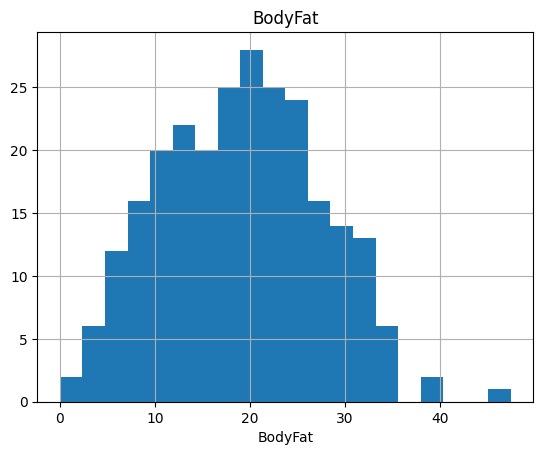

count   252.000
mean     44.885
std      12.602
min      22.000
1%       23.000
5%       25.000
10%      27.000
20%      34.000
30%      40.000
40%      41.000
50%      43.000
60%      47.000
70%      50.700
80%      55.000
90%      62.900
95%      67.000
99%      72.000
max      81.000
Name: Age, dtype: float64


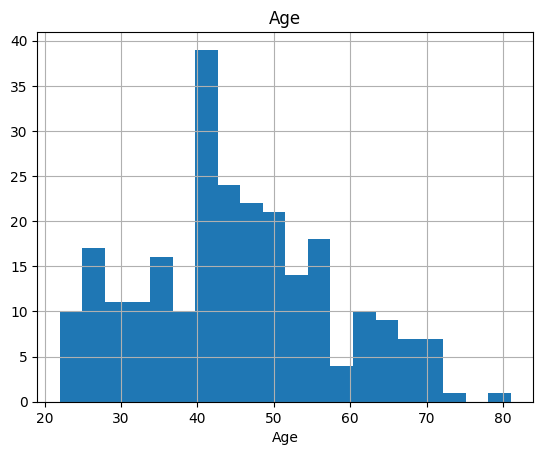

count   252.000
mean    178.924
std      29.389
min     118.500
1%      125.505
5%      136.387
10%     146.850
20%     155.250
30%     161.750
40%     168.250
50%     176.500
60%     182.950
70%     191.675
80%     201.200
90%     216.925
95%     225.650
99%     245.720
max     363.150
Name: Weight, dtype: float64


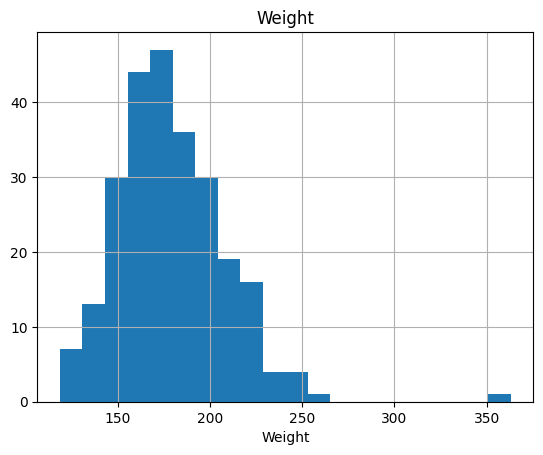

count   252.000
mean     70.149
std       3.663
min      29.500
1%       64.382
5%       65.888
10%      67.000
20%      67.750
30%      68.750
40%      69.500
50%      70.000
60%      71.150
70%      71.750
80%      72.500
90%      73.750
95%      74.500
99%      76.000
max      77.750
Name: Height, dtype: float64


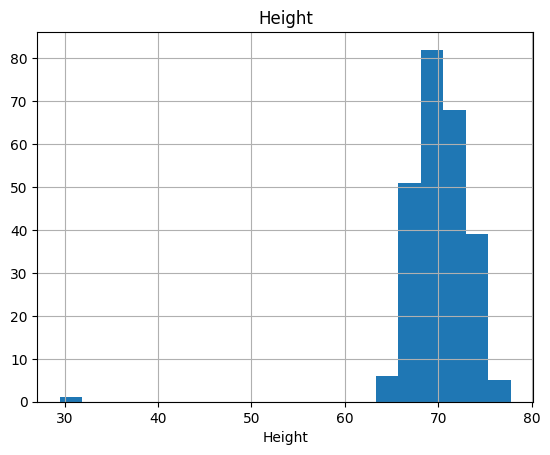

count   252.000
mean     37.992
std       2.431
min      31.100
1%       33.004
5%       34.255
10%      35.110
20%      36.000
30%      36.630
40%      37.400
50%      38.000
60%      38.500
70%      38.970
80%      40.200
90%      40.900
95%      41.845
99%      42.996
max      51.200
Name: Neck, dtype: float64


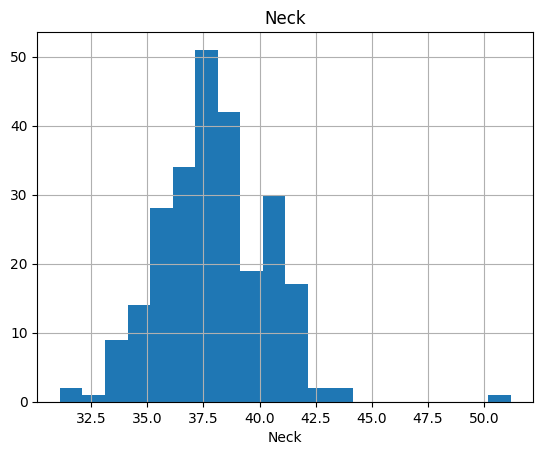

count   252.000
mean    100.824
std       8.430
min      79.300
1%       85.559
5%       89.020
10%      91.110
20%      93.320
30%      96.330
40%      98.340
50%      99.650
60%     101.960
70%     104.240
80%     106.800
90%     112.240
95%     116.340
99%     120.733
max     136.200
Name: Chest, dtype: float64


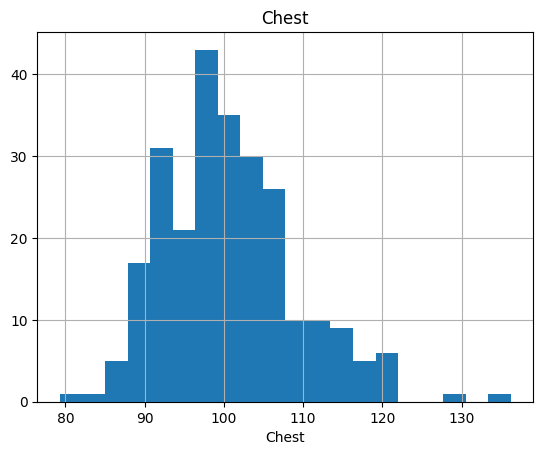

count   252.000
mean     92.556
std      10.783
min      69.400
1%       73.259
5%       76.875
10%      79.510
20%      83.420
30%      86.600
40%      89.140
50%      90.950
60%      94.580
70%      97.940
80%     100.500
90%     105.680
95%     110.760
99%     120.009
max     148.100
Name: Abdomen, dtype: float64


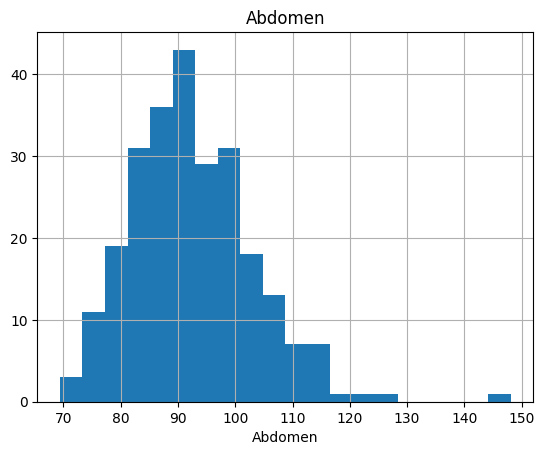

count   252.000
mean     99.905
std       7.164
min      85.000
1%       87.353
5%       89.155
10%      91.810
20%      94.500
30%      96.200
40%      98.200
50%      99.300
60%     100.600
70%     102.340
80%     104.800
90%     108.780
95%     112.125
99%     115.794
max     147.700
Name: Hip, dtype: float64


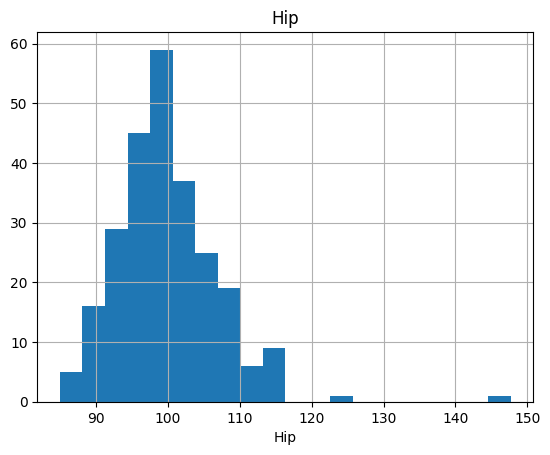

count   252.000
mean     59.406
std       5.250
min      47.200
1%       49.804
5%       51.155
10%      53.000
20%      55.000
30%      56.830
40%      57.880
50%      59.000
60%      60.200
70%      61.470
80%      63.400
90%      65.980
95%      68.545
99%      72.696
max      87.300
Name: Thigh, dtype: float64


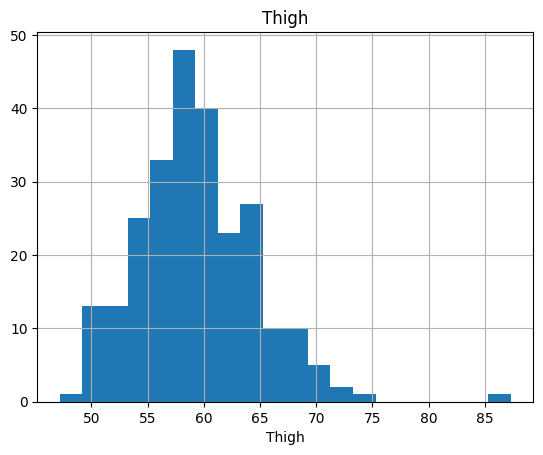

count   252.000
mean     38.590
std       2.412
min      33.000
1%       33.602
5%       34.800
10%      35.600
20%      36.500
30%      37.400
40%      38.100
50%      38.500
60%      39.000
70%      39.600
80%      40.300
90%      41.700
95%      42.645
99%      44.592
max      49.100
Name: Knee, dtype: float64


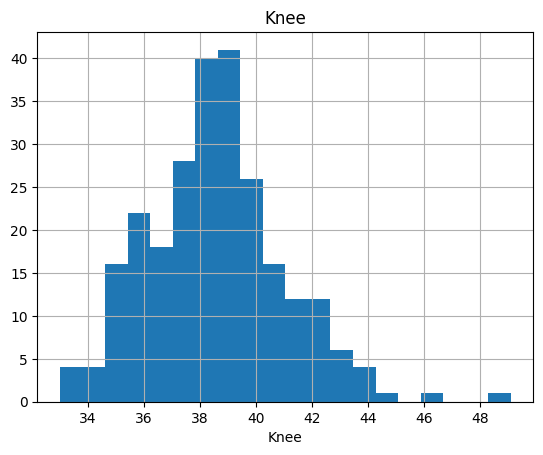

count   252.000
mean     23.102
std       1.695
min      19.100
1%       20.151
5%       21.000
10%      21.500
20%      21.900
30%      22.200
40%      22.500
50%      22.800
60%      23.200
70%      23.700
80%      24.360
90%      24.800
95%      25.445
99%      28.274
max      33.900
Name: Ankle, dtype: float64


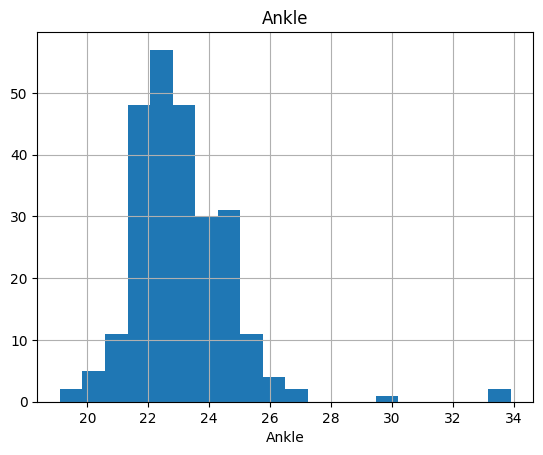

count   252.000
mean     32.273
std       3.021
min      24.800
1%       25.702
5%       27.610
10%      28.710
20%      29.800
30%      30.530
40%      31.340
50%      32.050
60%      32.900
70%      33.700
80%      35.100
90%      36.200
95%      37.200
99%      38.500
max      45.000
Name: Biceps, dtype: float64


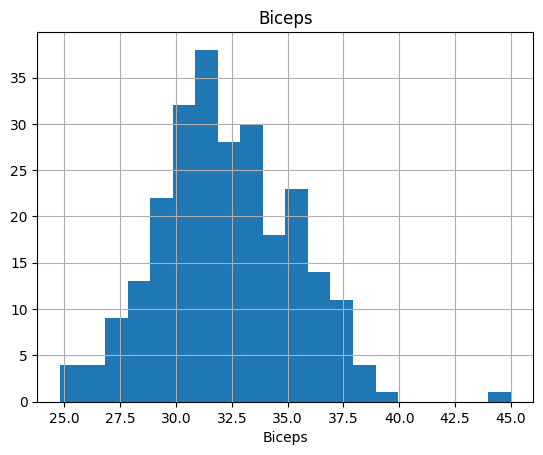

count   252.000
mean     28.664
std       2.021
min      21.000
1%       23.100
5%       25.700
10%      26.200
20%      27.020
30%      27.500
40%      28.200
50%      28.700
60%      29.300
70%      29.800
80%      30.300
90%      31.090
95%      31.745
99%      33.394
max      34.900
Name: Forearm, dtype: float64


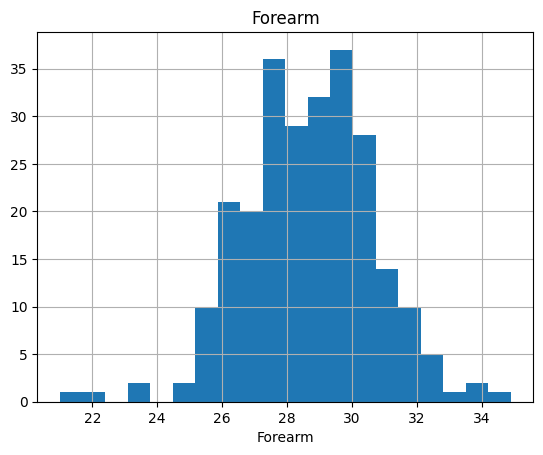

count   252.000
mean     18.230
std       0.934
min      15.800
1%       16.402
5%       16.800
10%      17.000
20%      17.400
30%      17.700
40%      18.000
50%      18.300
60%      18.500
70%      18.700
80%      19.000
90%      19.400
95%      19.800
99%      20.645
max      21.400
Name: Wrist, dtype: float64


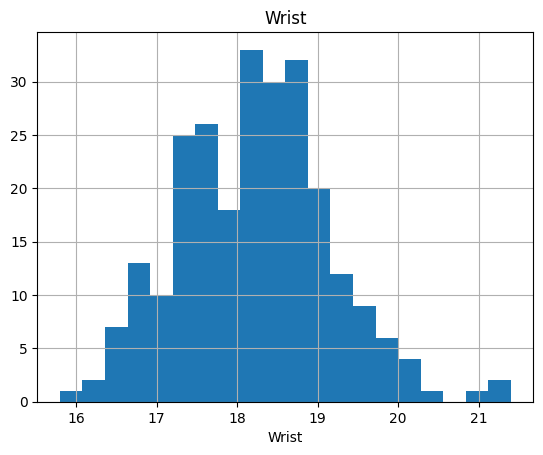

In [13]:
num_summary_df(df)

In [14]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(20,16))
  for index, col in enumerate(num_cols):
    plt.subplot(7,4,index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

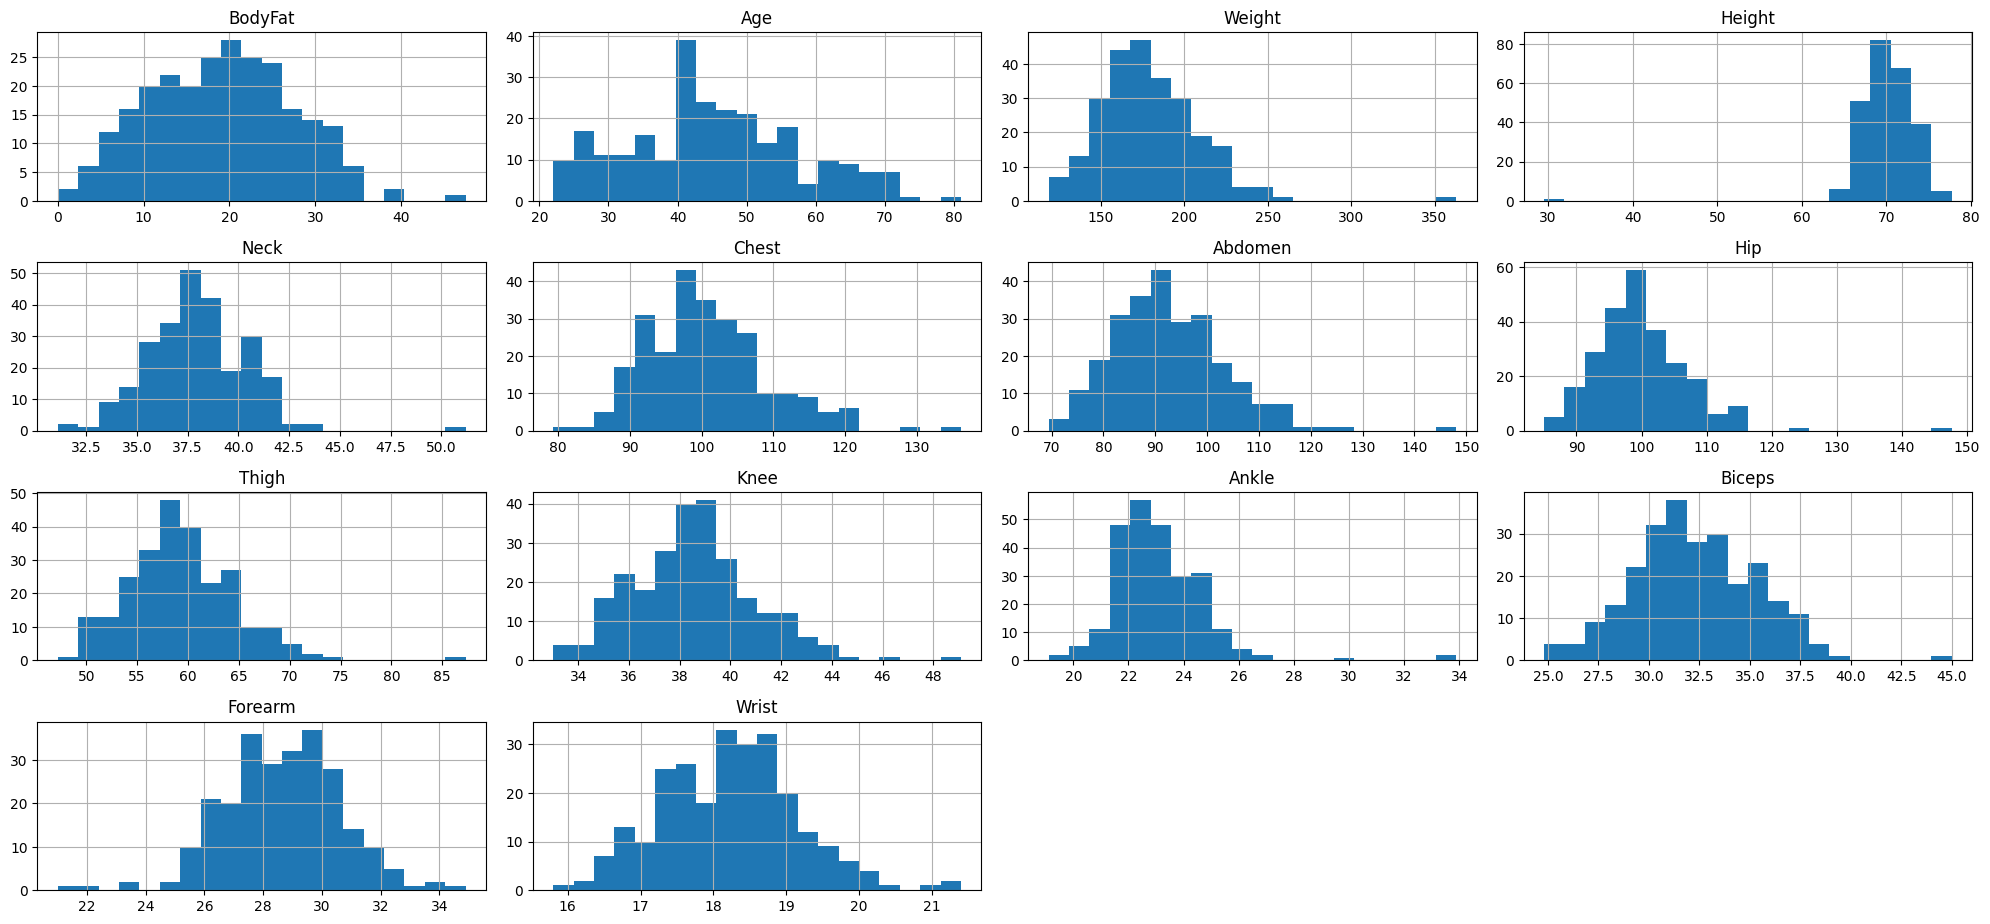

In [15]:
plot_num_summary(df)

# Target Analysis

In [16]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))
  print("#############################################")

In [17]:
def target_summary_with_cat_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    target_summary_with_cat(dataframe, target, col)

In [18]:
target_summary_with_cat_df(df, "BodyFat")

# Correlation Analysis

In [19]:
def correlated_cols(dataframe, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  print(corr)

  if plot:
    sns.set(rc={'figure.figsize': (18,13)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()

         BodyFat    Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  Biceps  Forearm  Wrist
BodyFat    1.000  0.291   0.612  -0.089 0.491  0.703    0.813  0.625  0.560 0.509  0.266   0.493    0.361  0.347
Age        0.291  1.000  -0.013  -0.172 0.114  0.176    0.230 -0.050 -0.200 0.018 -0.105  -0.041   -0.085  0.214
Weight     0.612 -0.013   1.000   0.308 0.831  0.894    0.888  0.941  0.869 0.853  0.614   0.800    0.630  0.730
Height    -0.089 -0.172   0.308   1.000 0.254  0.135    0.088  0.170  0.148 0.286  0.265   0.208    0.229  0.322
Neck       0.491  0.114   0.831   0.254 1.000  0.785    0.754  0.735  0.696 0.672  0.478   0.731    0.624  0.745
Chest      0.703  0.176   0.894   0.135 0.785  1.000    0.916  0.829  0.730 0.719  0.483   0.728    0.580  0.660
Abdomen    0.813  0.230   0.888   0.088 0.754  0.916    1.000  0.874  0.767 0.737  0.453   0.685    0.503  0.620
Hip        0.625 -0.050   0.941   0.170 0.735  0.829    0.874  1.000  0.896 0.823  0.558   0.739

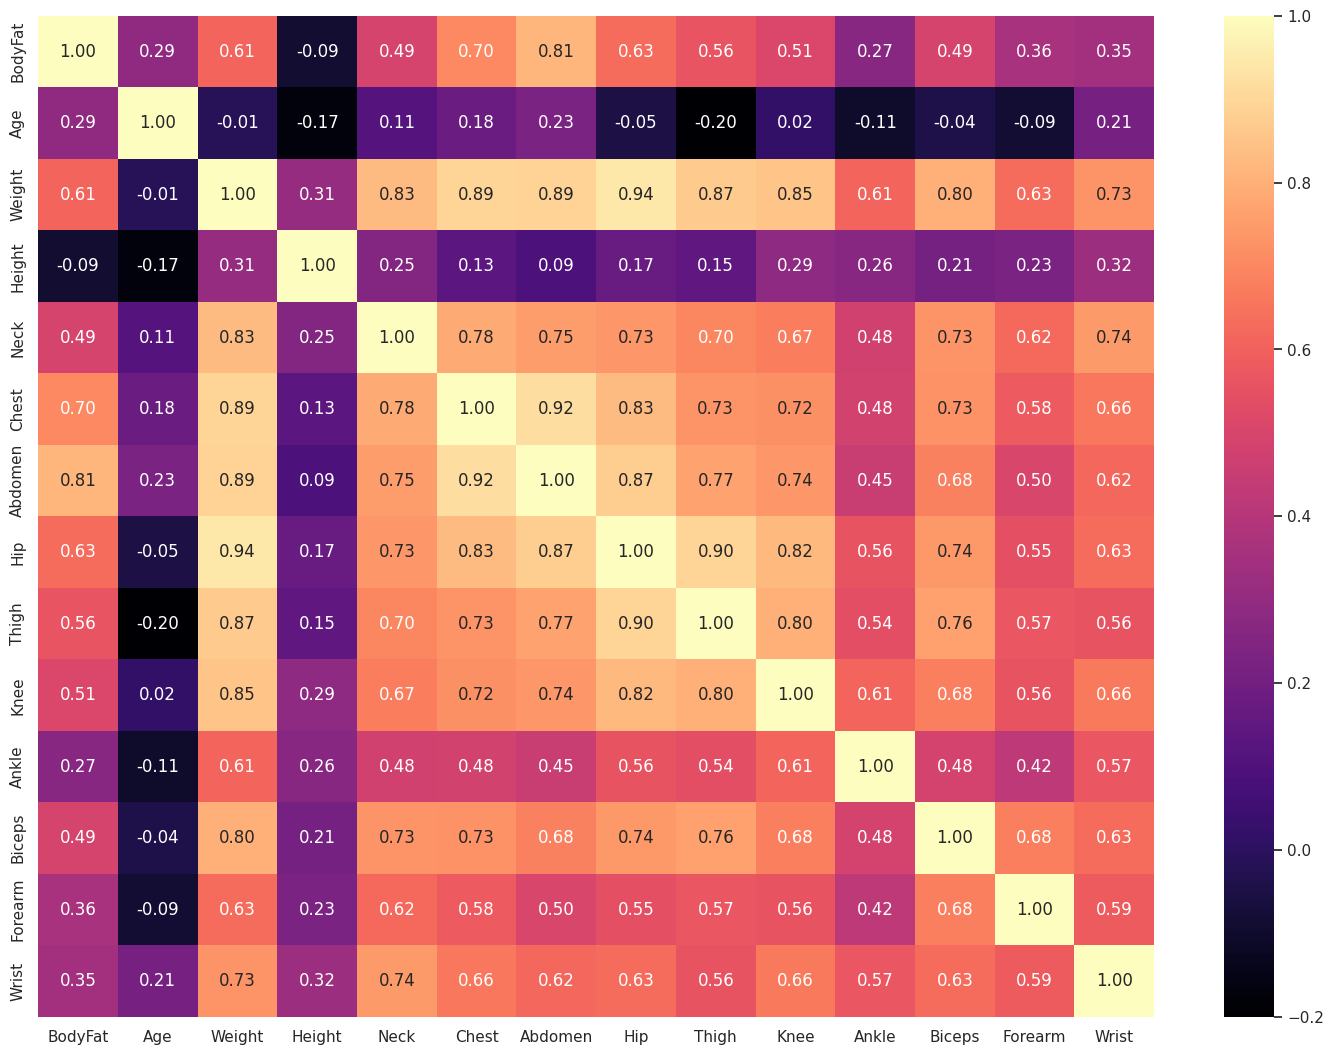

In [20]:
correlated_cols(df, plot=True)

In [25]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu", annot=True)
    plt.show()
  return drop_list

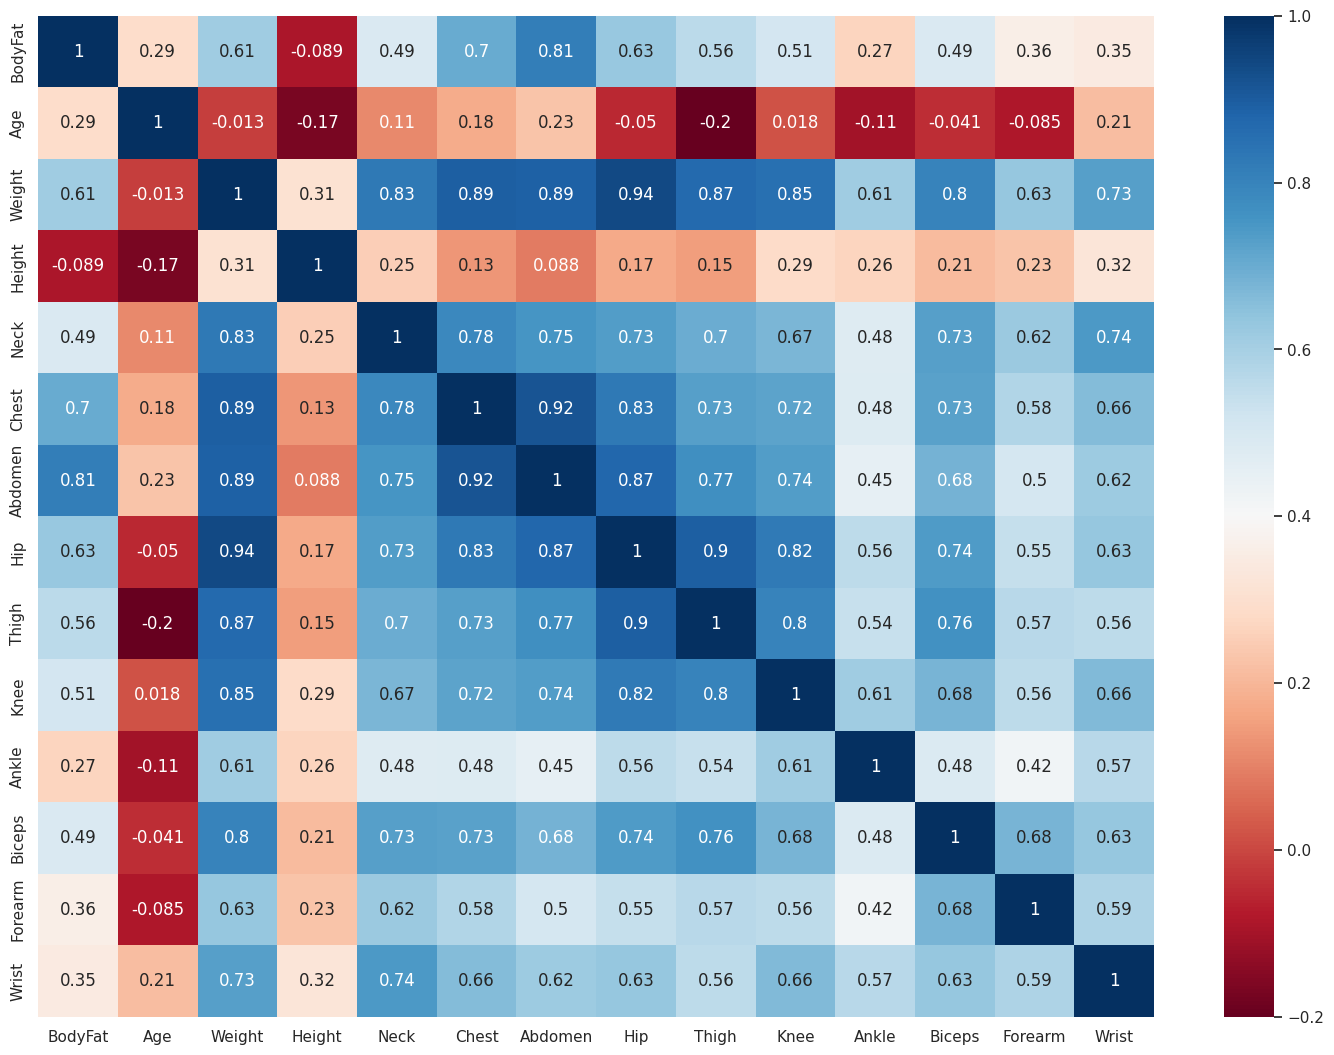

In [26]:
drop_list = high_correlated_cols(df, plot=True)

## Create distplot, boxplot, and probplot

In [27]:
def exploratory_data(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  fig,ax = plt.subplots(len(num_cols),3,figsize=(20,90))
  # sns.set(font_scale=2)
  for index, col in enumerate(num_cols):
    sns.distplot(dataframe[col],ax=ax[index,0])
    sns.boxplot(dataframe[col],ax=ax[index,1])
    stats.probplot(dataframe[col],plot=ax[index,2])
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.suptitle("Visualizing Continuous Columns")

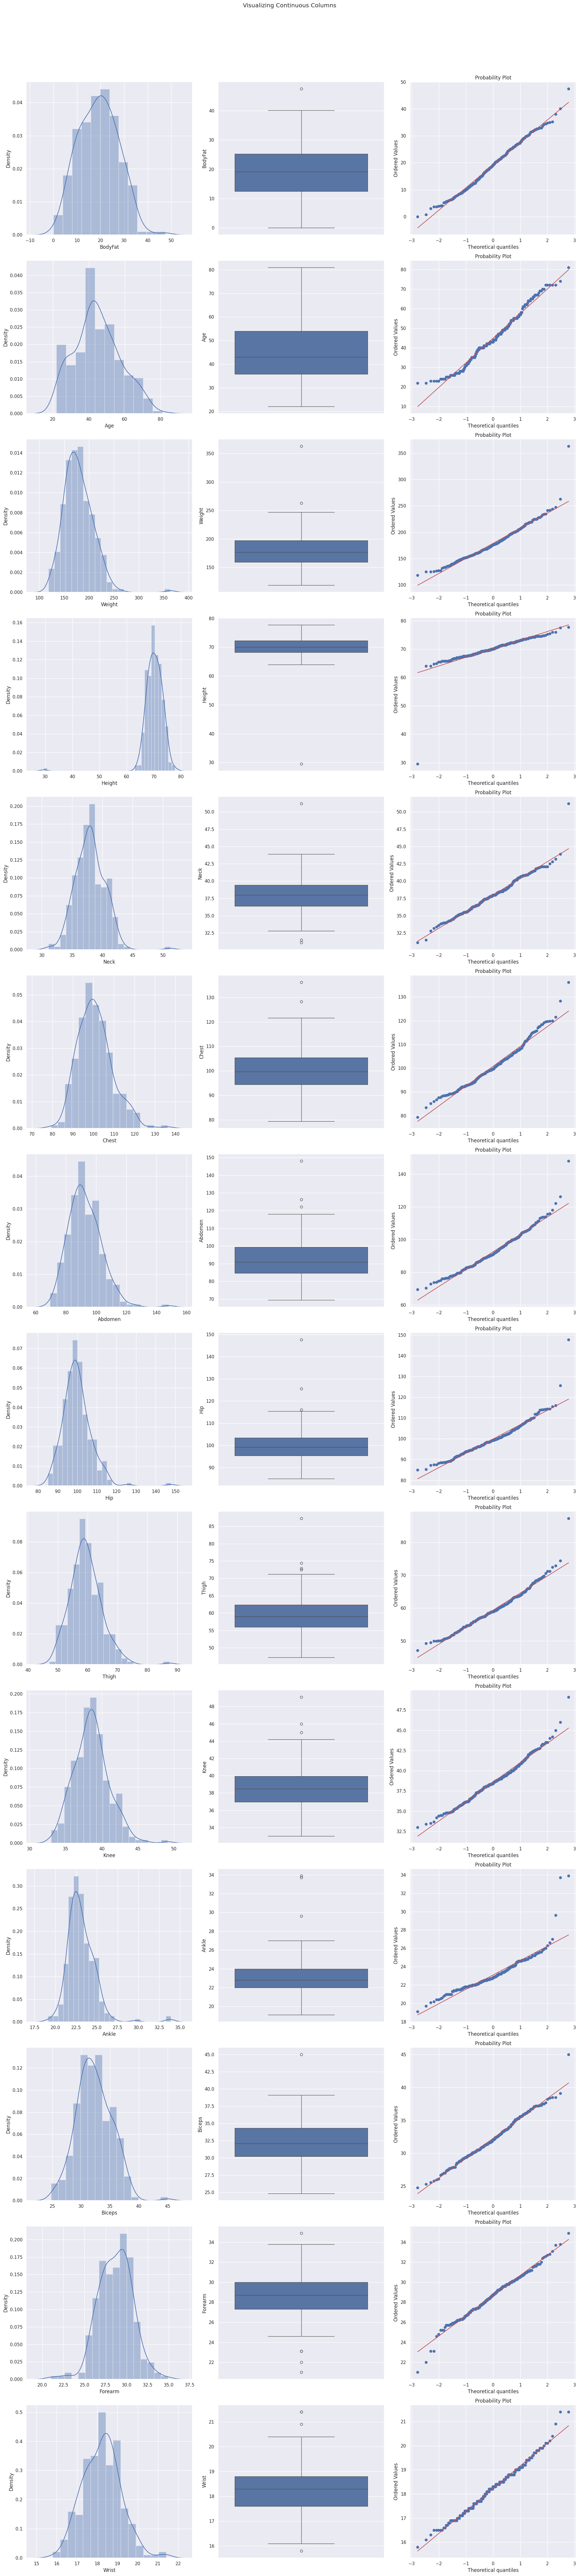

In [28]:
exploratory_data(df)

# Outlier Analysis

In [29]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [30]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [31]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [32]:
def solve_outliers(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [33]:
solve_outliers(df, "BodyFat")

Age False
Weight True
Height True
Neck True
Chest False
Abdomen True
Hip True
Thigh True
Knee False
Ankle True
Biceps False
Forearm False
Wrist False


In [34]:
def check_outlier_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))

In [35]:
check_outlier_df(df, "BodyFat")

Age False
Weight False
Height False
Neck False
Chest False
Abdomen False
Hip False
Thigh False
Knee False
Ankle False
Biceps False
Forearm False
Wrist False


# Missing Value Analysis

In [36]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [37]:
na_columns = missing_value_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [38]:
na_columns = missing_value_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [39]:
# Show Miising Value on Plot
def show_missing_value_plot(dataframe, bar=True, matrix=True, heatmap=True):
  if bar:
    msno.bar(dataframe);
  if matrix:
    msno.matrix(dataframe);
  if heatmap:
    msno.heatmap(dataframe);

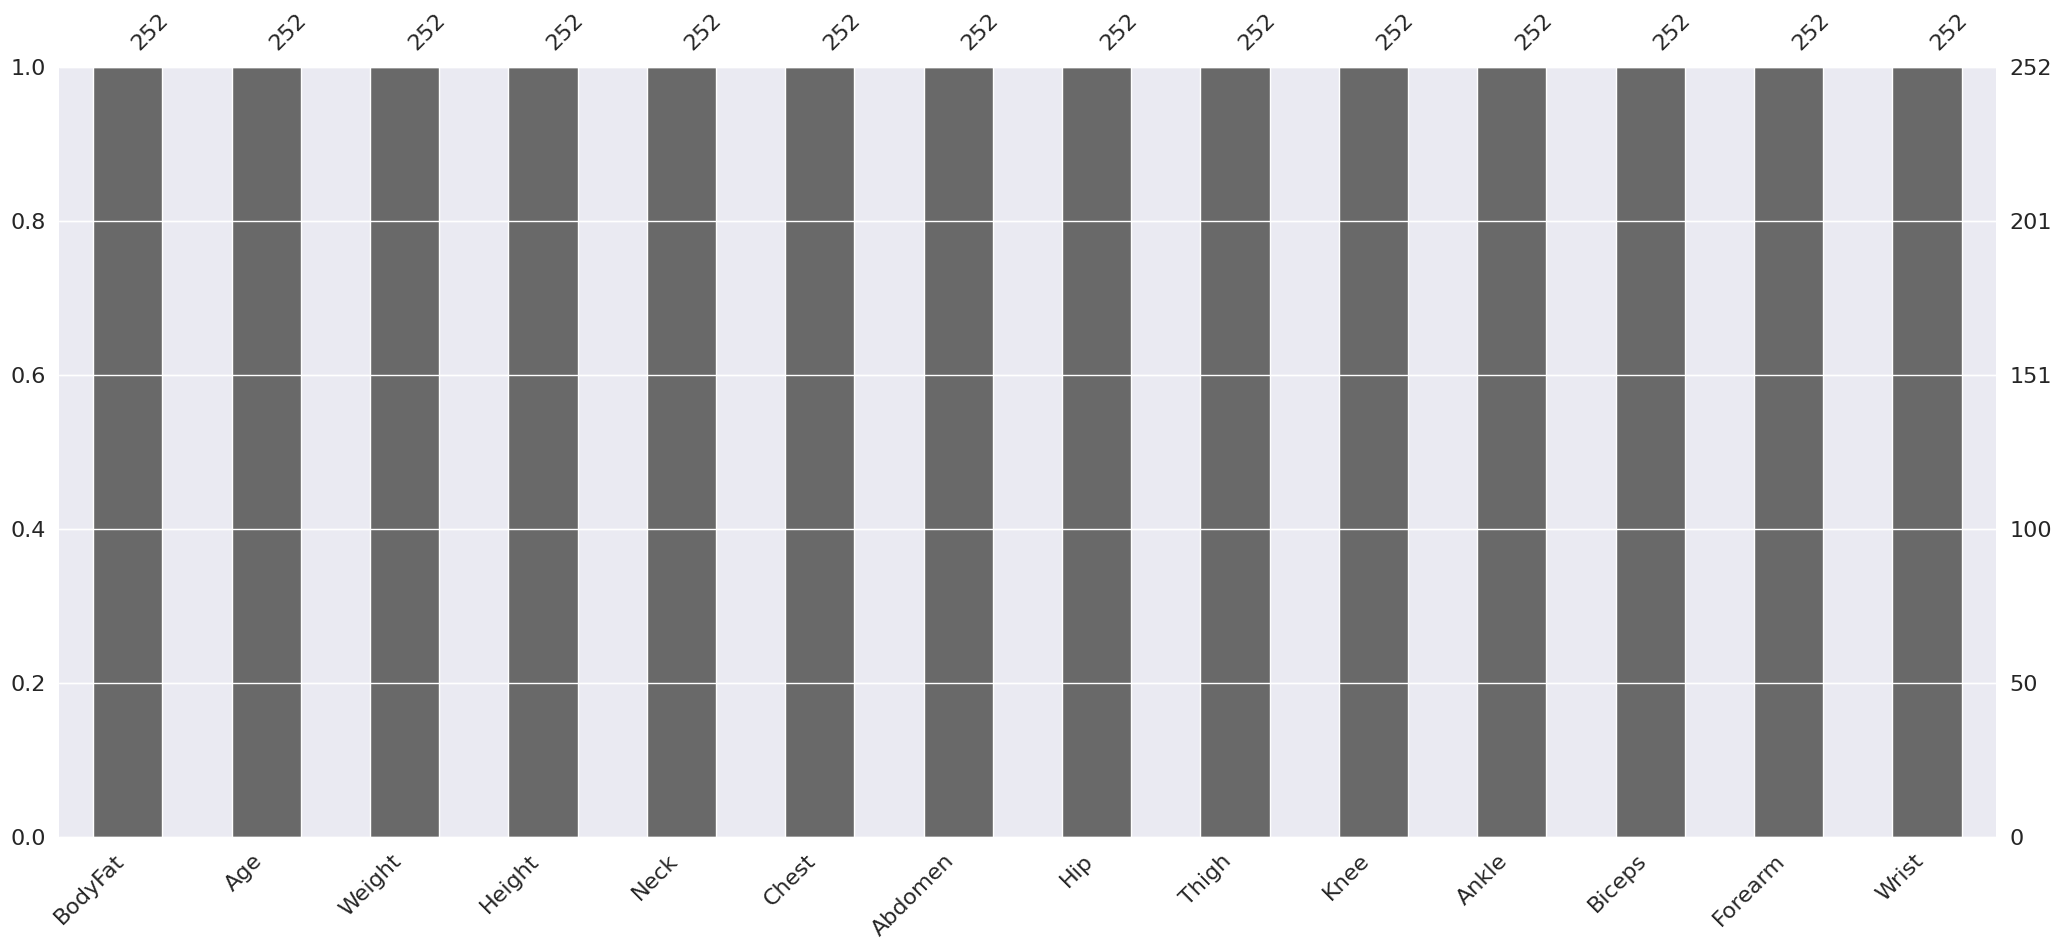

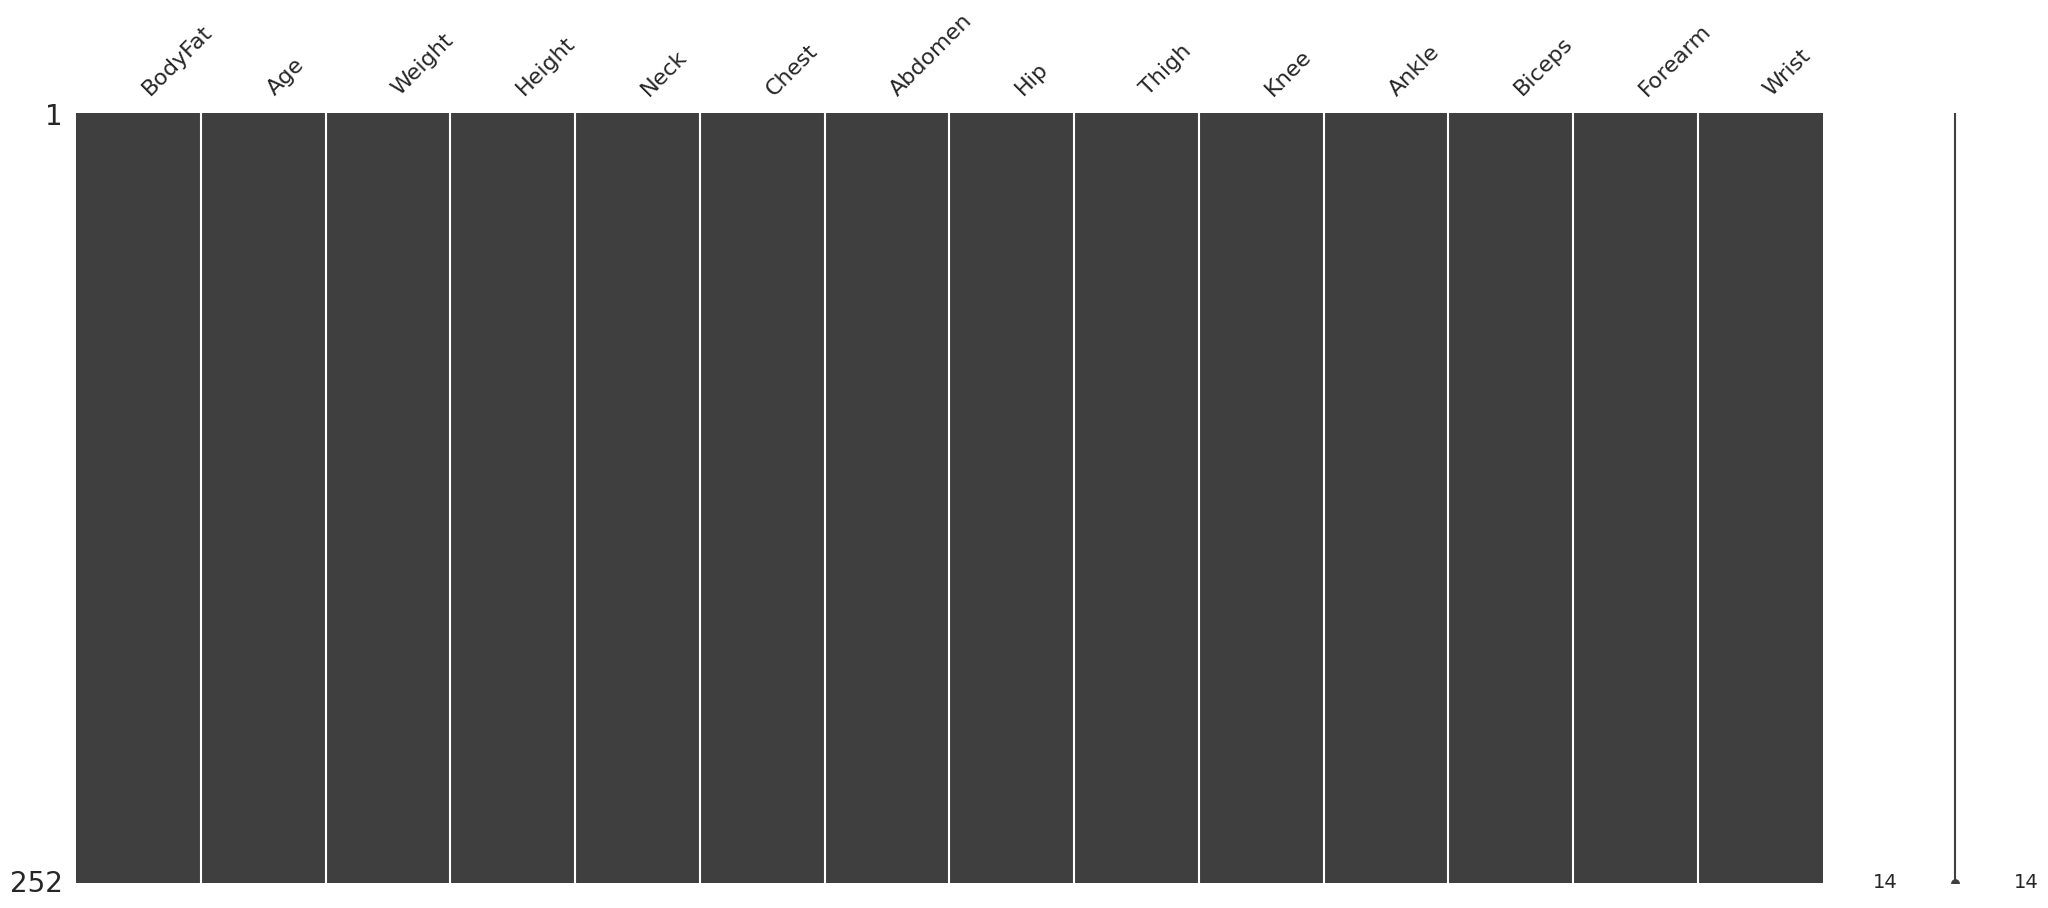

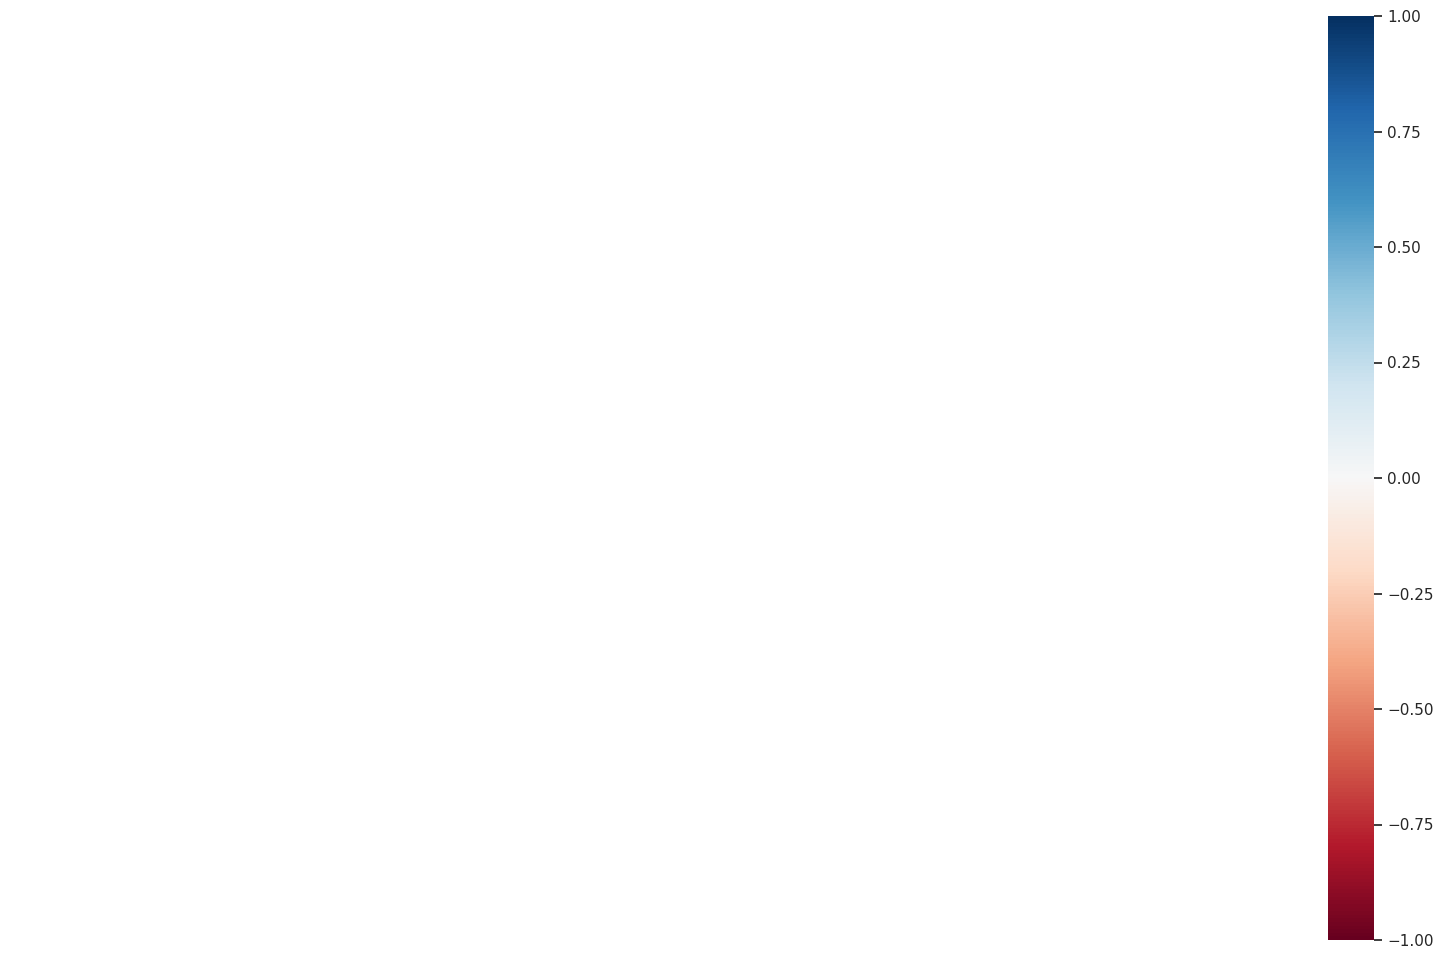

In [46]:
show_missing_value_plot(df)

In [47]:
# Examining the Relationship of Missing Values with the Dependent Variable
def missing_vs_target(dataframe, target):
  na_columns = missing_value_table(dataframe, na_name=True)
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        "Count": temp_df.groupby(col)[target].count()}))
    print("##################################################")

In [48]:
missing_vs_target(df, "BodyFat")

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [49]:
def quick_missing_imp(data, target, num_method="meidan", cat_length=20):
  variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
  temp_target = data[target]

  print("# BEFORE")
  print(data[variables_with_na].isnull().sum(), "\n\n")

  data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
  if num_method == "mean":
      data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
  elif num_method == "median":
      data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
  data[target] = temp_target

  print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
  print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
  print(data[variables_with_na].isnull().sum(), "\n\n")

  return data

In [50]:
df = quick_missing_imp(df, "BodyFat", num_method="median")

# BEFORE
Series([], dtype: float64) 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Series([], dtype: float64) 




In [51]:
def rare_analyser(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "Ratio": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [52]:
rare_analyser(df, "BodyFat")

In [53]:
def rare_encoder(dataframe, rare_prec):
  temp_df = dataframe.copy()
  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes in ["category","object"]
                  and (temp_df[col].value_counts() / len(temp_df) < rare_prec).any(axis=None)]
  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_prec].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])
  return temp_df

In [54]:
new_df = rare_encoder(df, 0.01)

# Encoding & Scaling

In [55]:
def label_encoding(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [56]:
def label_encoder(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() == 2]
  for col in binary_cols:
      dataframe = label_encoding(dataframe, col)
  return dataframe

In [57]:
df = label_encoder(df)

In [58]:
def one_hot_encoder(dataframe, target, drop_first=False):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() == 2]
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
    cat_cols = [col for col in cat_cols if col not in binary_cols and col not in [target]]
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [59]:
df = one_hot_encoder(df, "BodyFat", drop_first=True)

# Create a Base Model for All Regression Algorithms

In [68]:
def Create_and_Train_Regression_Models(dataframe, target, test_size=0.20, plot=False, save_results=False):
    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    results_dict = {'Model_Names': [],
                    'RMSE_Train': [],
                    'RMSE_Test': [],
                    'R2_score_Train': [],
                    'R2_score_Test': []
                    }

    models = [('LR', LinearRegression()),
              ("Ridge", Ridge()),
              ("Lasso", Lasso()),
              ("ElasticNet", ElasticNet()),
              ('SVR', SVR()),
              ('KNN', KNeighborsRegressor()),
              ('CART', DecisionTreeRegressor()),
              ('RF', RandomForestRegressor()),
              ("AdaBoost", AdaBoostRegressor()),
              ('BGTrees', BaggingRegressor(bootstrap_features=True)),
              ('GBM', GradientBoostingRegressor()),
              ("XGBoost", XGBRegressor(objective='reg:squarederror')),
              ("LightGBM", LGBMRegressor(verbose=-1)),
              ("CatBoost", CatBoostRegressor(verbose=False))]

    print("###################### Model Results ######################")

    for name, regressor in models:
        regressor.fit(X_train, y_train)
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)

        train_rmse_result = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse_result = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_r2_score = regressor.score(X_train, y_train)
        test_r2_score = regressor.score(X_test, y_test)

        results_dict['Model_Names'].append(name)
        results_dict['RMSE_Train'].append(train_rmse_result)
        results_dict['RMSE_Test'].append(test_rmse_result)
        results_dict['R2_score_Train'].append(train_r2_score)
        results_dict['R2_score_Test'].append(test_r2_score)

        with open(f'{name}_model.pkl', 'wb') as file:
            pickle.dump(regressor, file)

    model_results = pd.DataFrame(results_dict).set_index("Model_Names")
    model_results = model_results.sort_values(by="RMSE_Test", ascending=True)
    print(model_results)

    if plot:
        plt.figure(figsize=(15, 12))
        sns.barplot(x='RMSE_Test', y=model_results.index, data=model_results, color="r")
        plt.xlabel('RMSE Values')
        plt.ylabel('Model Names')
        plt.title('RMSE_Test for All Models')
        plt.show()

    if save_results:
        model_results.to_csv("model_results.csv")

    return model_results

###################### Model Results ######################
             RMSE_Train  RMSE_Test  R2_score_Train  R2_score_Test
Model_Names                                                      
Lasso             4.468      4.421           0.709          0.734
ElasticNet        4.376      4.425           0.721          0.734
GBM               1.361      4.517           0.973          0.723
Ridge             4.198      4.526           0.743          0.721
LR                4.198      4.530           0.743          0.721
LightGBM          2.090      4.642           0.936          0.707
RF                1.800      4.651           0.953          0.706
AdaBoost          3.454      4.774           0.826          0.690
CatBoost          0.337      4.926           0.998          0.670
XGBoost           0.001      5.188           1.000          0.634
KNN               4.397      5.423           0.718          0.600
BGTrees           2.346      5.655           0.920          0.565
CART            

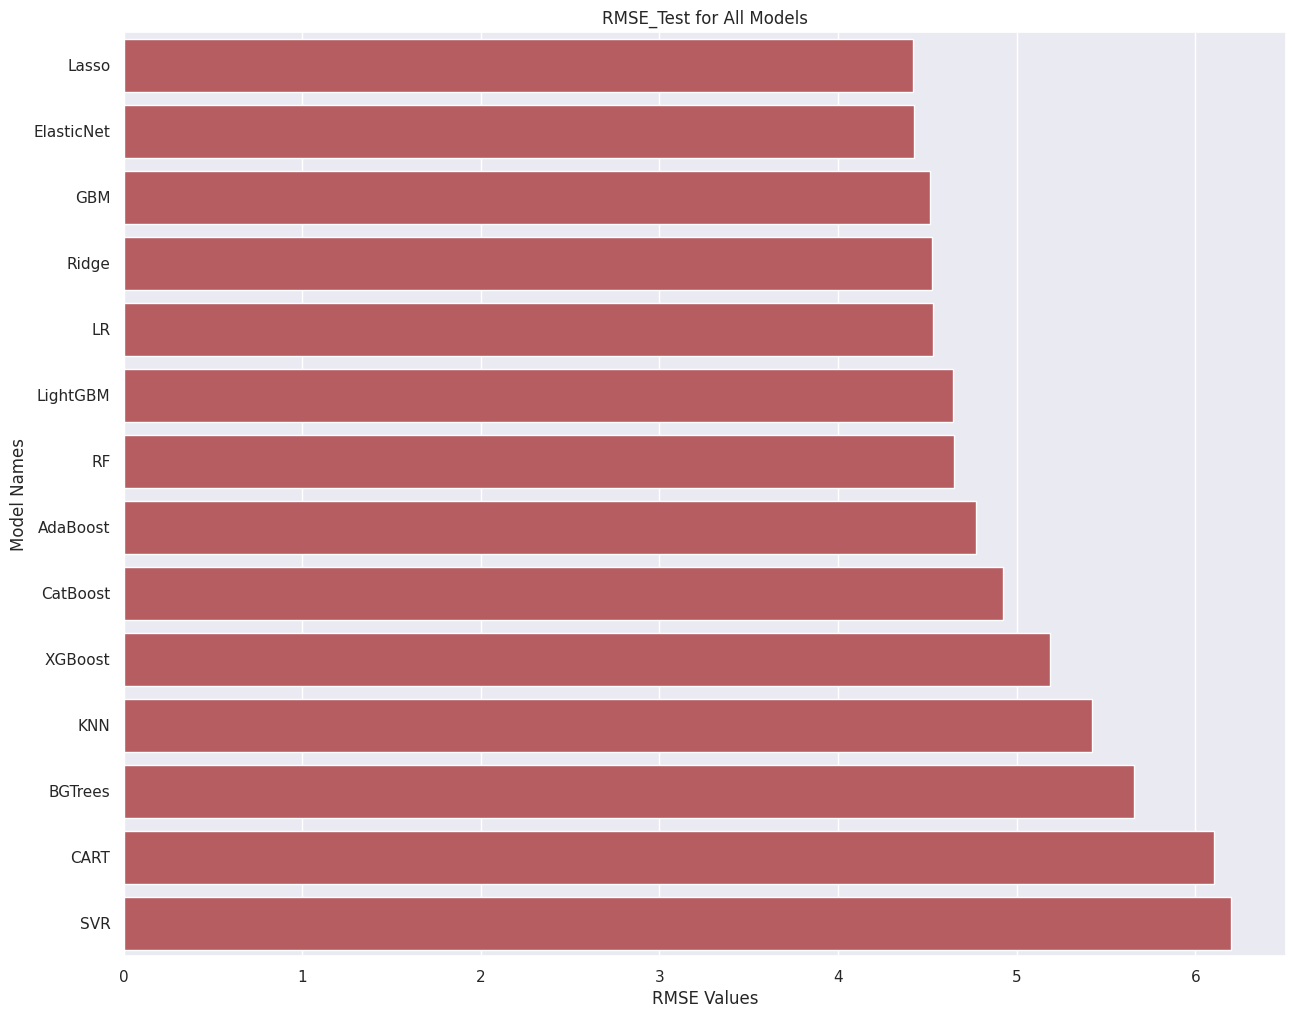

In [67]:
model_results = Create_and_Train_Regression_Models(df, "BodyFat", plot=True, save_results=True)

# Create Model Tuned

In [69]:
def Create_and_Train_Regression_Model_Tuning(dataframe, target, test_size=0.20, cv=10, plot=True, save_results=True):
    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    results_dict = {'Model_Names': [],
                    'RMSE_Train': [],
                    'RMSE_Test': [],
                    'R2_score_Train': [],
                    'R2_score_Test': [],
                    'Best_Params': []}

    ridge_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}
    lasso_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}
    enet_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}
    svr_params = {"C": np.arange(0.1,1,0.1)}
    knn_params = {"n_neighbors": np.arange(1,50,1)}
    cart_params = {"min_samples_split": range(2,100),
                   "max_leaf_nodes": range(2,10)}
    adaboost_params = {"learning_rate": [0.01, 0.1],
                       "loss": ["linear", "square", "exponential"],
                       "n_estimators": [100, 500, 1000]}
    xgboost_params = {"colsample_bytree": [0.4, 0.5 ,0.6],
                      "n_estimators": [200, 500, 1000],
                      "max_depth": [3,5,8],
                      "learning_rate": [0.1, 0.01]}
    rf_params = {"max_depth": [5, 8, 15, None],
                 "max_features": [5, 7, "auto"],
                 "min_samples_split": [8, 15, 20],
                 "n_estimators": [200, 500]}
    gbm_params = {"learning_rate": [0.01, 0.1],
                  "max_depth": [3, 8],
                  "n_estimators": [500, 1000],
                  "subsample": [1, 0.5, 0.7]}
    lightgbm_params = {"learning_rate": [0.01, 0.1],
                       "n_estimators": [300, 500],
                       "colsample_bytree": [0.7, 1]}
    catboost_params = {"iterations": [200, 500],
                       "learning_rate": [0.01, 0.1],
                       "depth": [3, 6]}

    regressors = [("Ridge", Ridge(), ridge_params),
                  ("Lasso", Lasso(), lasso_params),
                  ("ENet", ElasticNet(), enet_params),
                  ("SVR", SVR(), svr_params),
                  ("KNN", KNeighborsRegressor(), knn_params),
                  ("CART", DecisionTreeRegressor(), cart_params),
                  ("AdaBoost", AdaBoostRegressor(), adaboost_params),
                  ("XGBoost", XGBRegressor(objective="reg:squarederror"), xgboost_params),
                  ("RF", RandomForestRegressor(), rf_params),
                  ('GBM', GradientBoostingRegressor(), gbm_params),
                  ('LightGBM', LGBMRegressor(verbose=-1), lightgbm_params),
                  ("CatBoost", CatBoostRegressor(verbose=False), catboost_params)]

    for name, regressor, params in regressors:
        print(f"#################### {name} ####################")

        gs_best = GridSearchCV(regressor, params, cv=cv, n_jobs=-1, verbose=False).fit(X_train, y_train)

        final_model = regressor.set_params(**gs_best.best_params_).fit(X_train, y_train)
        train_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=cv, scoring="neg_mean_squared_error")))
        test_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=cv, scoring="neg_mean_squared_error")))
        train_r2_score = final_model.score(X_train, y_train)
        test_r2_score = final_model.score(X_test, y_test)

        results_dict['Model_Names'].append(name)
        results_dict['RMSE_Train'].append(train_rmse_result)
        results_dict['RMSE_Test'].append(test_rmse_result)
        results_dict['R2_score_Train'].append(train_r2_score)
        results_dict['R2_score_Test'].append(test_r2_score)
        results_dict['Best_Params'].append(gs_best.best_params_)

        with open(f'{name}_model.pkl', 'wb') as file:
            pickle.dump(final_model, file)

        print(f"RMSE_Train: {round(train_rmse_result, 4)} , RMSE_Test: {round(test_rmse_result, 4)} , R2_Train: {round(train_r2_score, 3)} , R2_Test: {round(test_r2_score, 3)} (Tuned Model) ({name}) ")
        print(f"{name} best params: {gs_best.best_params_}\n")

    model_tuned_results = pd.DataFrame(results_dict).set_index("Model_Names")
    model_tuned_results = model_tuned_results.sort_values(by="RMSE_Test", ascending=True)
    print(model_tuned_results)

    if plot:
        plt.figure(figsize=(15, 12))
        sns.barplot(x='RMSE_Test', y=model_tuned_results.index, data=model_tuned_results, color="r")
        plt.xlabel('RMSE Values')
        plt.ylabel('Model Names')
        plt.title('RMSE_Test for All Models')
        plt.show()

    if save_results:
        model_tuned_results.to_csv("model_tuned_results.csv")

    return model_tuned_results

#################### Ridge ####################
RMSE_Train: 4.4916 , RMSE_Test: 4.9476 , R2_Train: 0.733 , R2_Test: 0.731 (Tuned Model) (Ridge) 
Ridge best params: {'alpha': 152.69277544167062}

#################### Lasso ####################
RMSE_Train: 4.4562 , RMSE_Test: 5.2779 , R2_Train: 0.733 , R2_Test: 0.73 (Tuned Model) (Lasso) 
Lasso best params: {'alpha': 0.3289666123287841}

#################### ENet ####################
RMSE_Train: 4.4681 , RMSE_Test: 5.064 , R2_Train: 0.725 , R2_Test: 0.733 (Tuned Model) (ENet) 
ENet best params: {'alpha': 0.7599555414764666}

#################### SVR ####################
RMSE_Train: 6.4643 , RMSE_Test: 7.4594 , R2_Train: 0.401 , R2_Test: 0.467 (Tuned Model) (SVR) 
SVR best params: {'C': 0.9}

#################### KNN ####################
RMSE_Train: 5.3753 , RMSE_Test: 5.6692 , R2_Train: 0.681 , R2_Test: 0.557 (Tuned Model) (KNN) 
KNN best params: {'n_neighbors': 7}

#################### CART ####################
RMSE_Train: 5.0471 , RMSE

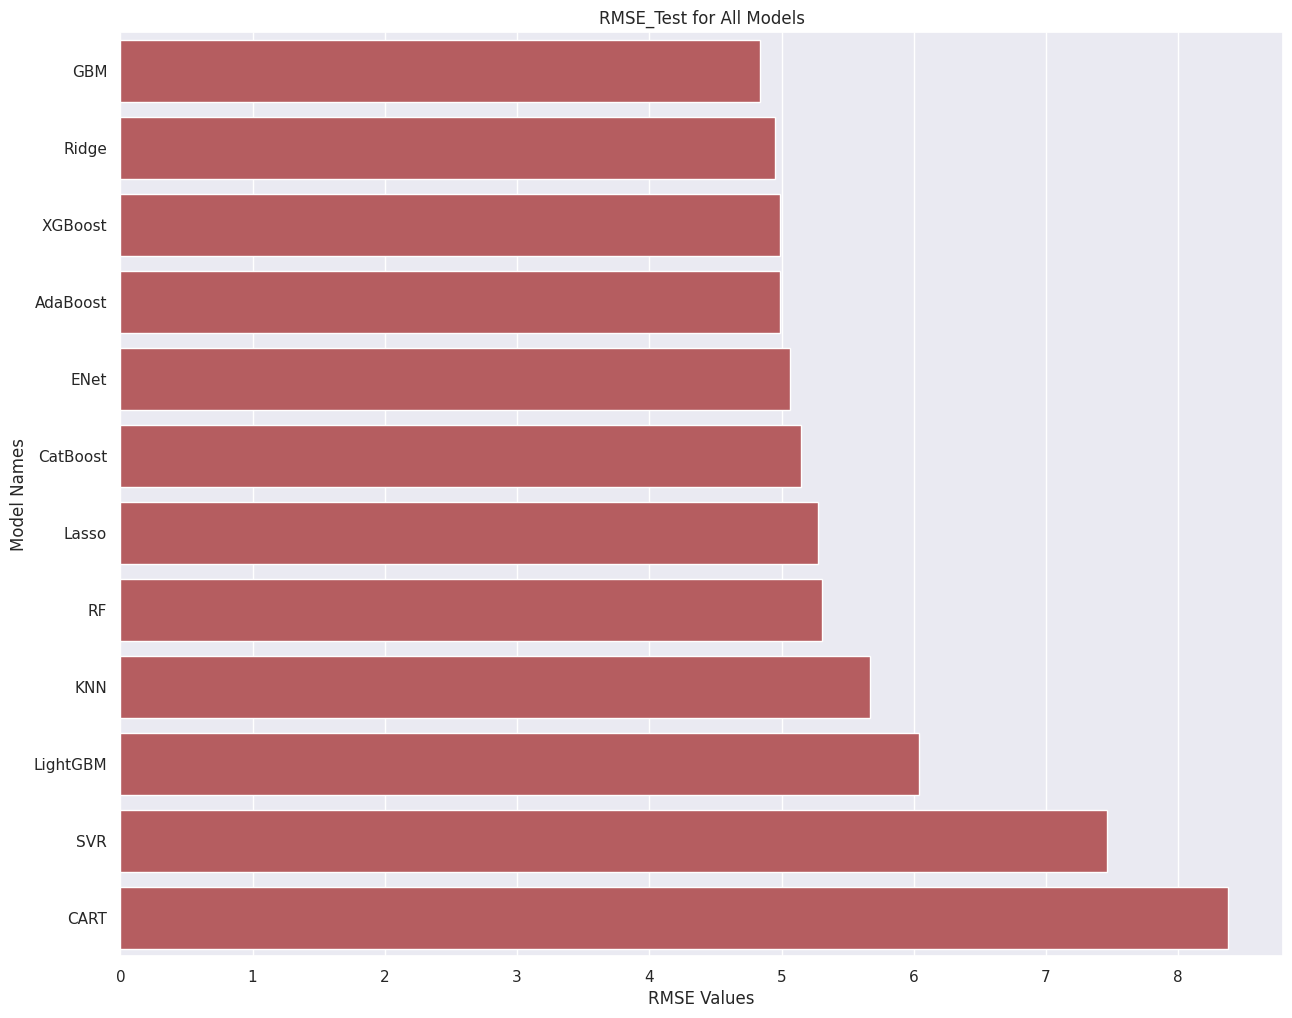

In [70]:
model_tuned_results = Create_and_Train_Regression_Model_Tuning(df, "BodyFat", plot=True, save_results=True)